In [36]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 4.1

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [12]:
# A review, where each word has been encoded as an integer
print(train_data[0])

# Whether a particular review is "positive" (i.e. 1) or "negative" (i.e. 0)
print(train_labels[0])

# No review will exceed 10,000 words because we specified this with num_words=10000 in previous cell
max([max(review) for review in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

## 4.1.2

In [14]:
# dictionary mapping words to integer index
word_index = imdb.get_word_index()

In [19]:
# dictionary mapping integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Offset by 3 because 0, 1, 2 are reserved for "padding", "start of sequence" and "unknown"
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Vectorising the data use multi-hot encoding

In [26]:
def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

print(x_train[0])

# Also vectorise the labels. Easy since they're already 0 or 1
y_train = np.asarray(train_labels).astype("float32")
print(train_labels[0])
print(y_train[0])

y_test = np.asarray(test_labels).astype("float32")

[0. 1. 1. ... 0. 0. 0.]
1
1.0


## 4.1.3

* Our input data are vectors
* Our outputs are scalar labels (1s and 0s)

A fully-connected (or `Dense`ly connected) network of layers with `relu` activations will work well here.

We now need to decide:
* How many layers to use. We will use 2 "hidden" or intermediate layers
* How many units to choose for each layer. We will use 16 units in each hidden layer, and 1 output unit

In [30]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

* Having 16 units in first hidden layers, means that the weight matrix $W$ will have shape `(input_dimension, 16)`
* The dot product with $W$ will project the input data onto a 16-dimensional representation space, before the bias vector `b` is added and `relu` is applied.
* More units means a higher dimensional representation space. In general, this allows the model to learn more complex representations.
* The sigmoid function in the final layers enables the network to output a probability. In this case, how likely a sample is to have the target "1": i.e. how likely a review is to be positive.

A few more modelling decisions:
* Loss: we will use the `binary_crossentropy` loss. This is usually the best choice when dealing with models that output probabilities
* Crossentropy: This comes from information theory and measures the distance between probability distributions. In our case, it measures the distance between our ground-truth distribution and our predictions

In [31]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 4.1.4

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-01-22 17:04:41.204617: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 2s 29ms/step - loss: 0.5133 - accuracy: 0.7995 - val_loss: 0.3954 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3115 - accuracy: 0.9023 - val_loss: 0.3079 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2273 - accuracy: 0.9259 - val_loss: 0.2873 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1797 - accuracy: 0.9420 - val_loss: 0.2751 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.9553 - val_loss: 0.2950 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1195 - accuracy: 0.9630 - val_loss: 0.2954 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0991 - accuracy: 0.9706 - val_loss: 0.3226 - val_accuracy: 0.8792
Epoch 8/20
30/30 [============

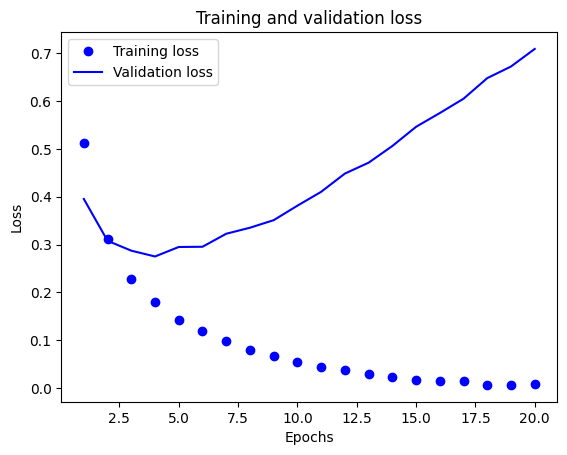

In [38]:
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

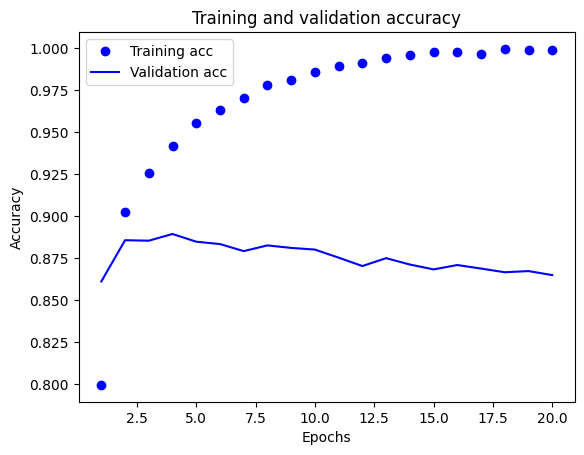

In [39]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Train and test a new model from scratch

In [46]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4633 - accuracy: 0.8160
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.9283
Epoch 4/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9424


In [47]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 618us/step - loss: 0.3113 - accuracy: 0.8766


## 4.1.5

In [48]:
# This outputs probability that each review is positive (close to 1) or negative (close to 0)
predictions = model.predict(x_test)
print(predictions)

782/782 [==============================] - 1s 607us/step
[[0.16889317]
 [0.9998396 ]
 [0.89054143]
 ...
 [0.11740097]
 [0.05935653]
 [0.47478268]]


# 4.2